### **Time Series Forecasting with Autoregressive Processes - DogeCoin**

**Objective**: predict DogeCoin stock price for first two weeks of Jan, 2022

**Origin of dataset:** [link text](https://finance.yahoo.com/quote/DOGE-USD/history/)

**Constrains:** AR(p) model is applied to stationary time series only.

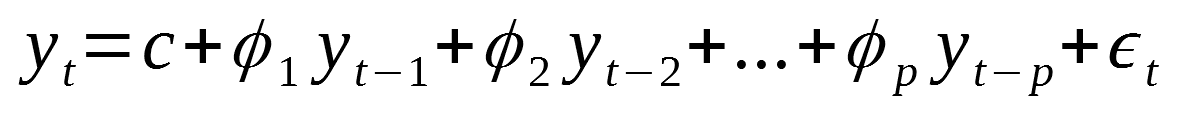

**Where:** '*p*' is the order number; '*c*' is a constant; '*epsilon*' is noise.

In [3]:
# loadng libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.figure(figsize = (12, 6))
sns.set(rc={'figure.figsize':(11.7,7.27)})
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import pacf
from statsmodels.regression.linear_model import yule_walker
from statsmodels.tsa.stattools import adfuller

from statsmodels.tsa.ar_model import AR

from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

<Figure size 864x432 with 0 Axes>

In [4]:
# loading data
path = "/content/drive/MyDrive/Colab Notebooks/data/4/DOGE-USD.csv"
df = pd.read_csv(path)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-02,0.005686,0.013698,0.005584,0.010615,0.010615,3.421563e+09
1,2021-01-03,0.010602,0.013867,0.009409,0.009771,0.009771,2.707004e+09
2,2021-01-04,0.009785,0.011421,0.007878,0.009767,0.009767,1.372399e+09
3,2021-01-05,0.009767,0.010219,0.008972,0.009920,0.009920,6.872561e+08
4,2021-01-06,0.009923,0.010854,0.009685,0.010465,0.010465,7.499155e+08
...,...,...,...,...,...,...,...
361,2021-12-29,0.174095,0.177339,0.166760,0.167765,0.167765,8.236283e+08
362,2021-12-30,0.168137,0.175771,0.165381,0.171313,0.171313,5.992368e+08
363,2021-12-31,0.171317,0.175294,0.167307,0.170496,0.170496,6.444167e+08
364,2022-01-01,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# dropping irrelevant columns
df = df[['Date', 'Close']]
df.columns

Index(['Date', 'Close'], dtype='object')

In [6]:
# checking for missing values
df.isnull().sum()

Date     0
Close    1
dtype: int64

In [7]:
mask_1 = df['Close'].isnull()
df[mask_1]

,Date,Close
364,2022-01-01,NaN


In [8]:
df['Close'] = df['Close'].fillna(method='ffill')
df.isnull().sum()

Date     0
Close    0
dtype: int64

In [9]:
# checking dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    366 non-null    object 
 1   Close   366 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [10]:
# converting 'Date' column to different type
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    366 non-null    datetime64[ns]
 1   Close   366 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


In [11]:
# leaving data for 2021 year only
mask_2 = (df['Date'] > "2020-12-31") & (df['Date'] < "2022-01-01")
df = df[mask_2]
df

,Date,Close
0,2021-01-02,0.010615
1,2021-01-03,0.009771
2,2021-01-04,0.009767
3,2021-01-05,0.009920
4,2021-01-06,0.010465
...,...,...
359,2021-12-27,0.187705
360,2021-12-28,0.174117
361,2021-12-29,0.167765
362,2021-12-30,0.171313


In [12]:
# setting 'Date' columns as index for simplicity of visualization
df_idx = df.set_index('Date')
df_idx.head()

,Close
Date,
2021-01-02,0.010615
2021-01-03,0.009771
2021-01-04,0.009767
2021-01-05,0.009920
2021-01-06,0.010465


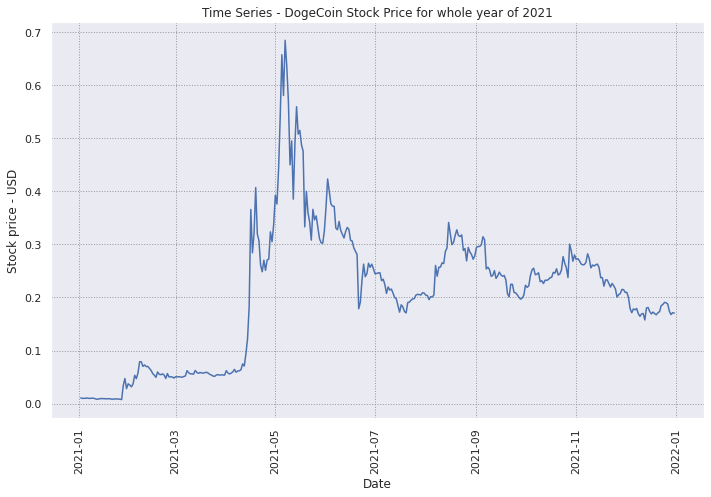

In [13]:
# taking the first look at our time series
_ = plt.plot(df_idx)
_ = plt.title("Time Series - DogeCoin Stock Price for whole year of 2021")
_ = plt.xlabel('Date')
_ = plt.ylabel('Stock price - USD')
_ = plt.xticks(rotation=90)
plt.show()

In [21]:
# splitting data into training and testing parts
data_train = df_idx[:-15]
data_test = df_idx[-15:]

In [22]:
# train autoregression model
# https://www.statsmodels.org/v0.12.2/generated/statsmodels.tsa.ar_model.AR.html
model_1 = AR(data_train, freq='D')
model_1_fit = model_1.fit()
model_1_fit

In [23]:
# getting lag_length
window = model_1_fit.k_ar
window

16

In [24]:
# getting the fitted parameters of the model
coef = model_1_fit.params
coef

const        0.005822
L1.Close     0.865997
L2.Close     0.220283
L3.Close     0.048027
L4.Close    -0.087164
L5.Close    -0.302755
L6.Close     0.088474
L7.Close     0.164409
L8.Close    -0.012883
L9.Close     0.150586
L10.Close   -0.122626
L11.Close   -0.084845
L12.Close   -0.063623
L13.Close    0.151272
L14.Close   -0.138974
L15.Close    0.156008
L16.Close   -0.056721
dtype: float64

In [25]:
# walking further, over time steps in test
history = data_train[len(data_train) - window:]
history = [history.iloc[i].values[0] for i in range(len(history))]
history

[0.20948699999999998,
 0.20972600000000002,
 0.199993,
 0.17885299999999998,
 0.171255,
 0.1784,
 0.176805,
 0.179151,
 0.169484,
 0.164422,
 0.169019,
 0.16989100000000001,
 0.157565,
 0.18015699999999998,
 0.181082,
 0.173454]

In [26]:
# making predictions
predictions = []

for i in range(len(data_test)): # 15 times
  length_hist = len(history) # 16
  #lag = [history[j] for j in range(length_hist - window, length_hist)]
  lag = history[i:]

  yhat = coef[0] # 0.005822

  for d in range(window): # 16
    #yhat += coef[d + 1] * lag[window - d - 1]
    yhat += coef[d + 1] * lag[(-1) - d]

  obs = data_test.iloc[i].values[0]
  predictions.append(yhat)
  history.append(obs)

  print(f"Predicted: {yhat} --- Expected value: {obs}")

Predicted: 0.17857092761496596 --- Expected value: 0.16901
Predicted: 0.17394114370813885 --- Expected value: 0.1724
Predicted: 0.167321133032751 --- Expected value: 0.169576
Predicted: 0.1665181968437579 --- Expected value: 0.167322
Predicted: 0.17349302072361467 --- Expected value: 0.171175
Predicted: 0.1719601673107576 --- Expected value: 0.173214
Predicted: 0.1776082732214597 --- Expected value: 0.18449000000000002
Predicted: 0.18684340935537508 --- Expected value: 0.186622
Predicted: 0.18883980817446008 --- Expected value: 0.190657
Predicted: 0.18906252821554795 --- Expected value: 0.19002
Predicted: 0.19455823956570475 --- Expected value: 0.18770499999999998
Predicted: 0.1848993607083289 --- Expected value: 0.174117
Predicted: 0.17582091258041668 --- Expected value: 0.167765
Predicted: 0.16819709283901826 --- Expected value: 0.17131300000000002
Predicted: 0.17026811325413765 --- Expected value: 0.170496


In [27]:
# adding prediction to our testing DataFrame for further analysis
data_test['Predicted'] = predictions
data_test.head()

,Close,Predicted
Date,,
2021-12-17,0.169010,0.178571
2021-12-18,0.172400,0.173941
2021-12-19,0.169576,0.167321
2021-12-20,0.167322,0.166518
2021-12-21,0.171175,0.173493


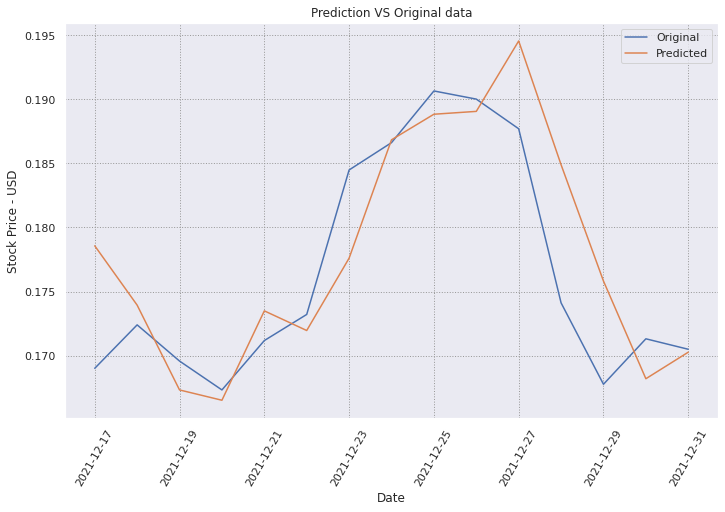

In [28]:
# looking at prediction via graph
_ = plt.plot(data_test['Close'], label='Original')
_ = plt.plot(data_test['Predicted'], label='Predicted')
_ = plt.legend(loc='best')
_ = plt.title("Prediction VS Original data")
_ = plt.xlabel("Date")
_ = plt.ylabel("Stock Price - USD")
_ = plt.xticks(rotation=60)
plt.show()

In [29]:
# applying some metrics
print(f"Lags: {window}")
mse_result = mean_squared_error(data_test['Close'], data_test['Predicted'])
print(f"MSE: {format(mse_result, '.8f')}")
mae_reult = mean_absolute_error(data_test['Close'], data_test['Predicted'])
print(f"MAE: {format(mae_reult, '.8f')}")
rmse_reult = math.sqrt(mean_squared_error(data_test['Close'],
                                         data_test['Predicted']))
print(f"RMSE: {format(rmse_reult, '.8f')}")

Lags: 16
MSE: 0.00002640
MAE: 0.00377638
RMSE: 0.00513792


In [30]:
df_idx.tail()

,Close
Date,
2021-12-27,0.187705
2021-12-28,0.174117
2021-12-29,0.167765
2021-12-30,0.171313
2021-12-31,0.170496


In [31]:
# applying to all data

model_1_final = AR(df_idx, freq='D')
model_1_final_fit = model_1_final.fit()

# getting lag_length
window = model_1_final_fit.k_ar

# getting the fitted parameters of the model
coef = model_1_final_fit.params

# walking further, over time steps in test
history = df_idx[len(df_idx) - window:]
history = [history.iloc[i].values[0] for i in range(len(history))]

# making predictions
predictions = []

for i in range(15): # 15 times
  length_hist = len(history) # 
  #lag = [history[j] for j in range(length_hist - window, length_hist)]
  lag = history[i:]

  yhat = coef[0] # 0.005822

  for d in range(window): # 16
    #yhat += coef[d + 1] * lag[window - d - 1]
    yhat += coef[d + 1] * lag[(-1) - d]

  #obs = data_test.iloc[i].values[0]
  predictions.append(yhat)
  history.append(yhat)

In [32]:
# converting to DF for simplicity of observation
df_pred_results = pd.DataFrame({
    'Date': pd.date_range(start='01/01/2022', end='01/15/2022'),
    'Prediction': predictions
})

df_pred_results = df_pred_results.set_index('Date')
df_pred_results

,Prediction
Date,
2022-01-01,0.172116
2022-01-02,0.177448
2022-01-03,0.182467
2022-01-04,0.182004
2022-01-05,0.183853
2022-01-06,0.182304
2022-01-07,0.182143
2022-01-08,0.182943
2022-01-09,0.185636


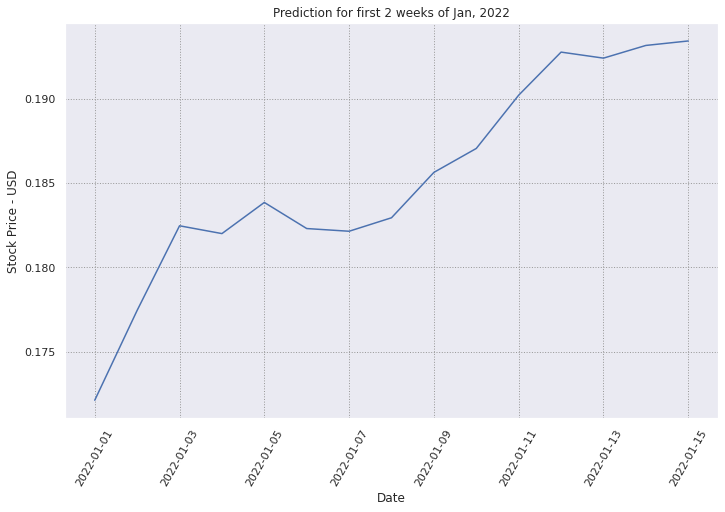

In [33]:
# graphing results
_ = plt.plot(df_pred_results)
_ = plt.title("Prediction for first 2 weeks of Jan, 2022")
_ = plt.xlabel("Date")
_ = plt.ylabel("Stock Price - USD")
_ = plt.xticks(rotation=60)
plt.show()